<a href="https://colab.research.google.com/github/FrankJRix/MF_gen_proto/blob/main/proc_gen_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from numpy.core.function_base import linspace
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
np.set_printoptions( linewidth=200)

N_ROOMS = 25
MAX_WEIGHT = 180
FRACTION = 0.3
SIGMA_FACTOR = 0.15

DISTRIBUTION_PLOT = False

class Room:
    # room of the dungeon generator whatever
    global_id = 0
    def __init__(self, lr, ud):
        type(self).global_id += 1
        self.id = type(self).global_id

        self.angle_lr = lr
        self.angle_ud = ud # might not be an angle
        self.base_weight = lr + ud # experimental
        self.weight_modifier = 1 # placeholder

        self.up = []
        self.down = []
        self.left = []
        self.right = []

        self.pos = [0,0,0]
        self.rotation = 0

        self.can_walk_back = False
        self.can_fly_back = False
    def __str__(self):
        return f"id: {self.id}, lr: {self.angle_lr}, ud: {self.angle_ud}, up: {self.up}, down: {self.down}, left: {self.left}, right: {self.right}, pos: {self.pos}, rotation: {self.rotation}"

def compute_sfn_parameters(n):
    M = MAX_WEIGHT
    N = N_ROOMS

    m = FRACTION * M/N

    mu = m * n
    sigma = SIGMA_FACTOR * (M + M*n/N)

    return mu, sigma

def slifat_normal(step, dim = 1):
    mu, sigma = compute_sfn_parameters(step)

    return np.random.normal(mu, sigma, dim).round().item()
def slifat_normal_fun(t, step):
    mu, sigma = compute_sfn_parameters(step)

    return np.sqrt(1 / (2 * np.pi * sigma**2)) / np.exp((t - mu)**2 / (2 * sigma**2))


In [59]:
t = linspace(0, MAX_WEIGHT, 200)
dim = 1
dungeon = []

if DISTRIBUTION_PLOT:
    plt.figure(figsize=(10,7))
for step in range(N_ROOMS+1):
    if DISTRIBUTION_PLOT:
        plt.plot(t, slifat_normal_fun(t, step))

    w = max(0, slifat_normal(step, dim))
    w = min(w, MAX_WEIGHT)
    z = max(0, slifat_normal(step, dim))
    z = min(z, MAX_WEIGHT)

    dungeon.append(Room(w/2, z/4))

if DISTRIBUTION_PLOT:
    plt.grid(True, 'both', linestyle='--')
    plt.xlim(0, MAX_WEIGHT)
    plt.tight_layout()

D = 5
for i in range(len(dungeon)-1):

    dungeon[i+1].pos[0] = dungeon[i].pos[0] + D * np.cos( np.radians( dungeon[i].rotation ) )
    dungeon[i+1].pos[1] = dungeon[i].pos[1] + D * np.sin( np.radians( dungeon[i].rotation ) )

    dungeon[i+1].pos[2] = dungeon[i].pos[2] - D * np.sin( np.radians( dungeon[i].angle_ud ) )
    dungeon[i+1].rotation = (dungeon[i].rotation + dungeon[i+1].angle_lr) % 360

map = []
for r in dungeon:
    map.append(r.pos)
map = np.array(map)

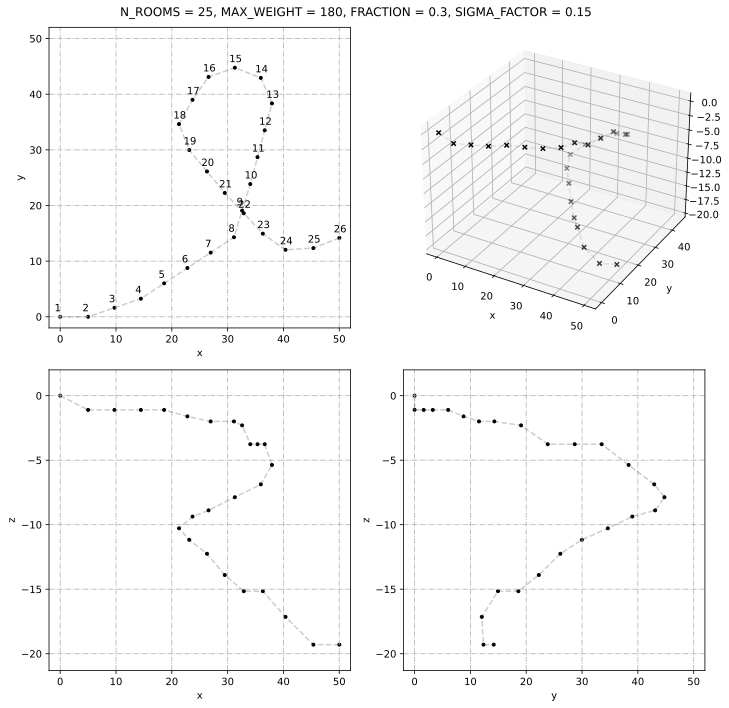

In [60]:
mn = min(map[:,0].min(), map[:,1].min())
mx = max(map[:,0].max(), map[:,1].max())

a = plt.figure(figsize = (10,10))

plt.subplot(2, 2, 1)
plt.scatter(map[:,0], map[:,1], marker='.', color='black')
plt.plot(map[:,0], map[:,1], linestyle='--', color='black', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(mn-2, mx+2)
plt.ylim(mn-2, mx+2)
plt.grid(linestyle = '-.')
for i in range(len(dungeon)):
    plt.annotate(f"{dungeon[i].id}", xy=(map[i,0], map[i,1]), xytext=(map[i,0]-1, map[i,1]+1))

plt.subplot(2, 2, 4)
plt.scatter(map[:,1], map[:,2], marker='.', color='black')
plt.plot(map[:,1], map[:,2], linestyle='--', color='black', alpha=0.2)
plt.xlabel('y')
plt.ylabel('z')
plt.xlim(mn-2, mx+2)
plt.ylim(map[:,2].min()-2, map[:,2].max()+2)
plt.grid(linestyle = '-.')

plt.subplot(2, 2, 3)
plt.scatter(map[:,0], map[:,2], marker='.', color='black')
plt.plot(map[:,0], map[:,2], linestyle='--', color='black', alpha=0.2)
plt.xlabel('x')
plt.ylabel('z')
plt.xlim(mn-2, mx+2)
plt.ylim(map[:,2].min()-2, map[:,2].max()+2)
plt.grid(linestyle = '-.')

ax = plt.subplot(2, 2, 2, projection='3d')
ax.scatter(map[:,0], map[:,1], map[:,2], marker='x', color='black')
ax.plot(map[:,0], map[:,1], map[:,2], linestyle='--', color='black', alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')

a.suptitle(f"N_ROOMS = {N_ROOMS}, MAX_WEIGHT = {MAX_WEIGHT}, FRACTION = {FRACTION}, SIGMA_FACTOR = {SIGMA_FACTOR}")
plt.tight_layout()
#plt.savefig("mf_dungeon_test.pdf", bbox_inches='tight')
plt.show()

In [61]:
for e in dungeon:
    print(e)
    print()

id: 1, lr: 16.5, ud: 12.75, up: [], down: [], left: [], right: [], pos: [0, 0, 0], rotation: 0

id: 2, lr: 19.0, ud: 0.0, up: [], down: [], left: [], right: [], pos: [5.0, 0.0, -1.1034871751075055], rotation: 19.0

id: 3, lr: 0.0, ud: 0.0, up: [], down: [], left: [], right: [], pos: [9.727592877996585, 1.6278407722857835, -1.1034871751075055], rotation: 19.0

id: 4, lr: 14.5, ud: 0.0, up: [], down: [], left: [], right: [], pos: [14.45518575599317, 3.255681544571567, -1.1034871751075055], rotation: 33.5

id: 5, lr: 0.0, ud: 5.75, up: [], down: [], left: [], right: [], pos: [18.62461486632901, 6.015366471131857, -1.1034871751075055], rotation: 33.5

id: 6, lr: 0.0, ud: 4.5, up: [], down: [], left: [], right: [], pos: [22.794043976664852, 8.775051397692149, -1.6044274831678869], rotation: 33.5

id: 7, lr: 0.0, ud: 0.0, up: [], down: [], left: [], right: [], pos: [26.963473087000693, 11.534736324252439, -1.9967229618071116], rotation: 33.5

id: 8, lr: 39.5, ud: 3.5, up: [], down: [], left: